# MACHINE LEARNING ALGORITHMS TEST
# -- CLASSIFICATION --

## First Guidelines

## 0. Starting up

### 0.1. Import Libraries

In [1]:
import pandas                 as pd
import numpy                  as np
from matplotlib import pyplot as plt

# KNN
from sklearn           import metrics  as mt
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree, Logistic Regression
import cv2
from graphviz   import Source
from sklearn    import datasets        as dt
from sklearn    import tree            as tr
from sklearn    import model_selection as ms
from sklearn    import linear_model    as lm

# Random Forest
from six        import StringIO
from sklearn    import ensemble        as en

### 0.2. Load Dataset

In [2]:
MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_X_training.csv'
df_X_train = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_X_validation.csv'
df_X_val = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_X_test.csv'
df_X_test = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_y_training.csv'
df_y_train = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_y_validation.csv'
df_y_val = pd.read_csv( MyCSV )

MyCSV = 'http://menezes.mendonca.nom.br/datasets/FML/FML_Classificacao_y_test.csv'
df_y_test = pd.read_csv( MyCSV )

In [15]:
#                   X DATASET STRUCTURE:
# id  . . . . . . . . . . . . . . . . . 
# customer_type                         binary [ 0, 1]
# age . . . . . . . . . . . . . . . . . min=0.0, max=1.0, avg=0.4157
# class                                 [0. , 0.5, 1. ]
# flight_distance . . . . . . . . . . . min=0.0, max=1.0, avg=0.2343
# inflight_wifi_service                 [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# departure_arrival_time_convenient . . [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# ease_of_online_booking                [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# gate_location . . . . . . . . . . . . [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# food_and_drink                        [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# online_boarding                       [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# seat_comfort  . . . . . . . . . . . . [ 0.  , 0.25, 0.5 , 0.75, 1. ]
# inflight_entertainment                [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# on_board_service  . . . . . . . . . . [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# leg_room_service                      [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# baggage_handling  . . . . . . . . . . [ 0.  , 0.25, 0.5 , 0.75, 1. ]
# checkin_service                       [ 0.  , 0.25, 0.5 , 0.75, 1. ]
# inflight_service  . . . . . . . . . . [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# cleanliness                           [ 0. , 0.2, 0.4, 0.6, 0.8, 1. ]
# departure_delay_in_minutes  . . . . . min=0.0, max=1.0, avg=0.15
# arrival_delay_in_minutes              min=0.0, max=1.0, avg=0.15
# gender_Female . . . . . . . . . . . . binary [ 0, 1]
# gender_Male                           binary [ 0, 1]
# type_of_travel_business_travel  . . . binary [ 0, 1]
# type_of_travel_personal_travel        binary [ 0, 1]

#                   Y DATASET STRUCTURE:
# binary [ 0, 1]
#

### 0.3. Plotting

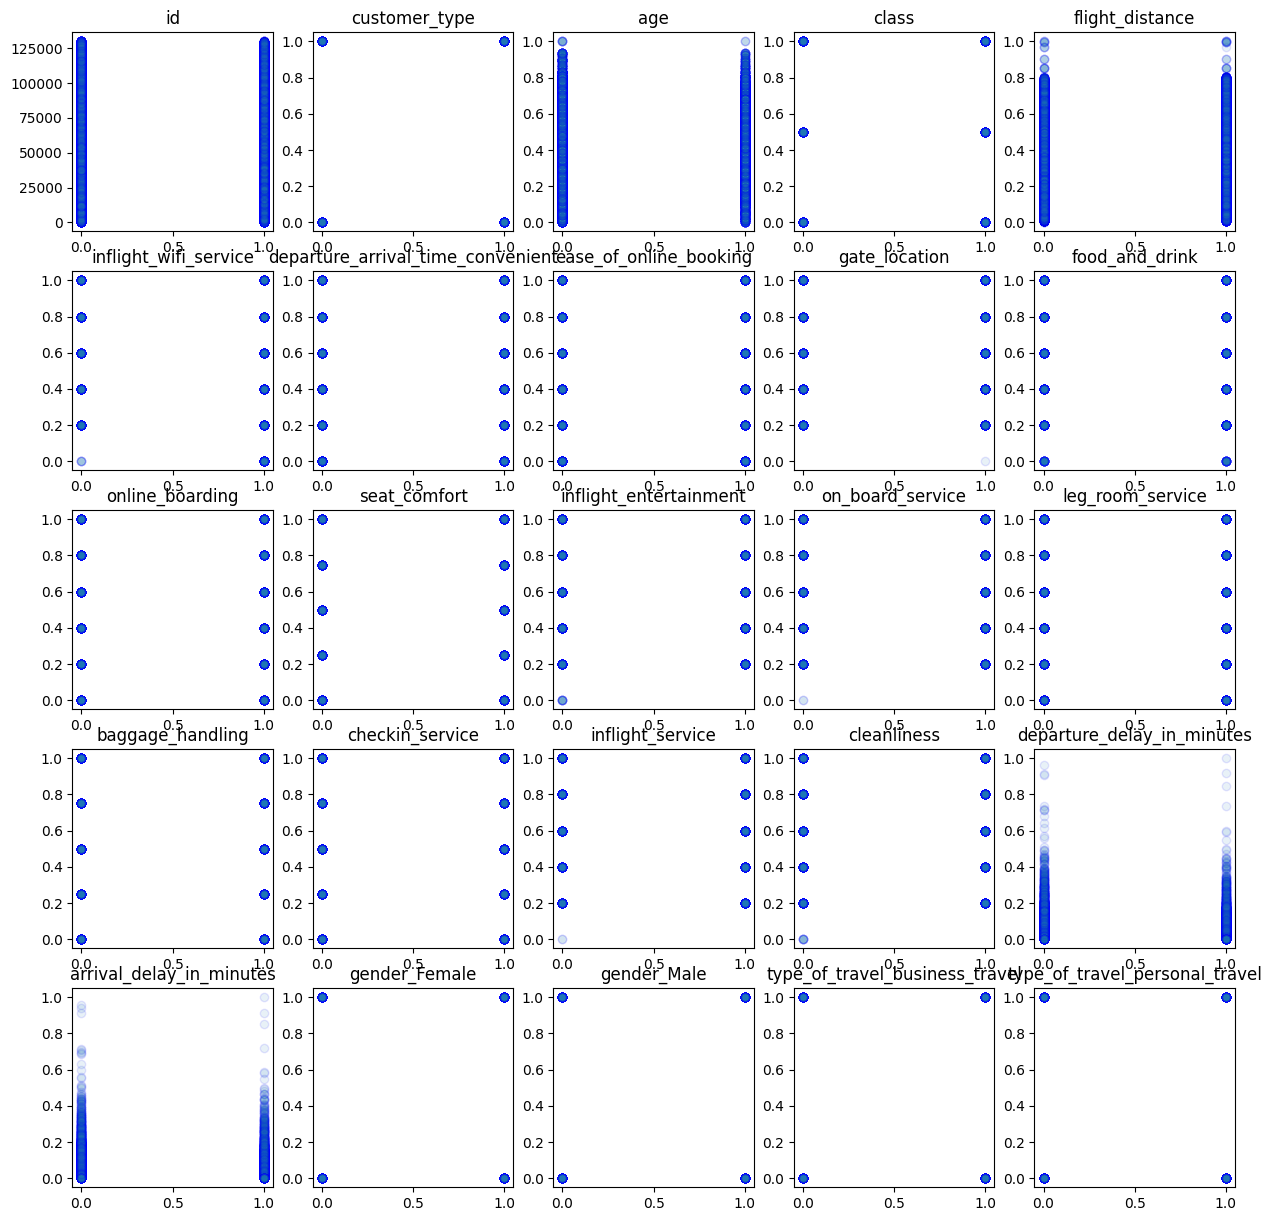

In [33]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#

plt.figure( figsize=(15, 15) )
name = df_X_train.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 5, 5, p+1 )
    plt.scatter( df_y_train, df_X_train.loc[:, name[p] ], alpha=0.1, edgecolors='b' )
    plt.title( name[p] )

## 1. Algorithm: K-NEAREST NEIGHBORS (KNN)

### 1.1. Features Selection

In [4]:
# FEATURES SELECTION
# Keep just the numerical features that represent a distance.
# In other words: discard the ID and all binary features.

# Original features
features = ['age', 'class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking', 
       'gate_location', 'food_and_drink', 'online_boarding', 
       'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# Selected features
features = ['age', 'class', 'flight_distance', 'inflight_wifi_service',
            'departure_arrival_time_convenient', 'ease_of_online_booking',
            'gate_location', 'food_and_drink', 'online_boarding', 
            'seat_comfort', 'inflight_entertainment',
            'on_board_service', 'leg_room_service', 
            'departure_delay_in_minutes', 'arrival_delay_in_minutes']

X_train_knn = df_X_train.loc[:, features]
X_val_knn = df_X_val.loc[:, features]
X_test_knn = df_X_test.loc[:, features]

y_train = df_y_train.iloc[:, 0].values
y_val   = df_y_val.iloc[:, 0].values
y_test  = df_y_test.iloc[:, 0].values

print(f"X_train_knn: shape={X_train_knn.shape}")
print(f"y_train:     shape={y_train.shape}")
print(f"X_val_knn: shape={X_val_knn.shape}")
print(f"y_val:     shape={y_val.shape}")
print(f"X_test_knn:  shape={X_test_knn.shape}")
print(f"y_test:      shape={y_test.shape}")


X_train_knn: shape=(72515, 15)
y_train:     shape=(72515,)
X_val_knn: shape=(31079, 15)
y_val:     shape=(31079,)
X_test_knn:  shape=(25893, 15)
y_test:      shape=(25893,)


### 1.2. Optimization & Holdout Validation

In [5]:
# Searching for the best K parameter

KK = [     3,  5,  7,  9, 11, 13, 15, 17, 19, 
      21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 
      41, 43, 45, 47, 49, 51, 53, 55, 57, 59 ]
#KK = [ 5 ]   # best parameter
best_k = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
F1_list = list()
Accuracy_list = list()
Precision_list = list()
Recall_list = list()

for k in KK:
    # model definition
    knn_classifier = KNeighborsClassifier( n_neighbors = k )
    # Training KNN:
    knn_classifier.fit( X_train_knn, y_train )
    # Using the model to classify the validation dataset
    yhat_val = knn_classifier.predict( X_val_knn )
    # Save result in dataset
    df_result = X_val_knn.copy()
    df_result['classificacao'] = yhat_val

    # Performance Metrics
    Matrix = mt.confusion_matrix( y_val, yhat_val )
    Accuracy = mt.accuracy_score( y_val, yhat_val )
    Precision = mt.precision_score( y_val, yhat_val )
    Recall = mt.recall_score( y_val, yhat_val )
    F1_score = mt.f1_score( y_val, yhat_val )

    Accuracy_list.append(Accuracy)
    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_list.append(F1_score)

    if Recall > best_Recall:
        best_Recall = Recall

    if Precision > best_Precision:
        best_Precision = Precision

    if F1_score > best_F1:
        best_F1 = F1_score
        best_k = k
        knn_BestClassifier = knn_classifier

# Show best result:
print(f"BEST K: {best_k}")


BEST K: 5


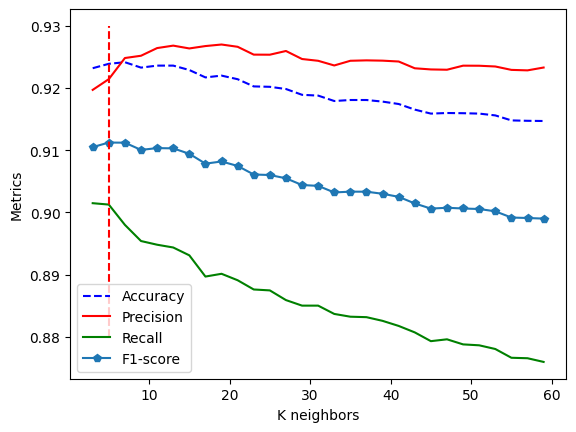

In [6]:
# Plot results
plt.plot( KK, Accuracy_list,  'b--', label='Accuracy')
plt.plot( KK, Precision_list,  'r-', label='Precision')
plt.plot( KK, Recall_list,  'g-', label='Recall')
plt.plot( KK, F1_list,  'p-', label='F1-score')
plt.xlabel( 'K neighbors' )
plt.ylabel( 'Metrics' )
plt.legend()
plt.vlines( best_k, 0.88, 0.93, color='r', linestyle='--' )
#plt.hlines( 0.95, 0, 1, color='b', linestyle='--' )
#plt.hlines( 0.68, 0, 1, color='g', linestyle='--' )


### 1.3. FIT Again for X_TRAIN + X_VAL

In [9]:
#.......... FINAL KNN MODEL

# Model
knn_FinalClassifier = KNeighborsClassifier( n_neighbors = best_k )
# Fit Again
knn_FinalClassifier.fit( 
    np.concatenate( (X_train_knn, X_val_knn) ), 
    np.concatenate( (y_train, y_val) ) 
)


KNeighborsClassifier()

### 1.4. Performance in training set: using X_TRAIN

In [10]:
# CASE-1: PERFORMANCE FOR X_TRAIN

yhat_train = knn_BestClassifier.predict( X_train_knn )
df_result = X_train_knn.copy()
df_result['classificacao'] = yhat_train

# Performance Metrics
Matrix = mt.confusion_matrix( y_train, yhat_train )
Accuracy = mt.accuracy_score( y_train, yhat_train )
Precision = mt.precision_score( y_train, yhat_train )
Recall = mt.recall_score( y_train, yhat_train )
F1_score = mt.f1_score( y_train, yhat_train )

print("matriz de confusão")
print( Matrix )
print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

matriz de confusão
[[39514  1573]
 [ 2302 29126]]
Acurácia: 94.656
Precisão: 94.876
Recall..: 92.675
F1-score: 93.763


### 1.5. Performance in validation set: using X_VAL

In [11]:
# CASE-2: PERFORMANCE FOR X_VAL

yhat_val = knn_BestClassifier.predict( X_val_knn )
df_result = X_val_knn.copy()
df_result['classificacao'] = yhat_val

# Performance Metrics
Matrix = mt.confusion_matrix( y_val, yhat_val )
Accuracy = mt.accuracy_score( y_val, yhat_val )
Precision = mt.precision_score( y_val, yhat_val )
Recall = mt.recall_score( y_val, yhat_val )
F1_score = mt.f1_score( y_val, yhat_val )

print("matriz de confusão")
print( Matrix )
print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

matriz de confusão
[[16575  1035]
 [ 1330 12139]]
Acurácia: 92.390
Precisão: 92.144
Recall..: 90.125
F1-score: 91.123


### 1.6. Final Performance, in Production, using X_TEST

In [12]:
# CASE-4: PERFORMANCE FOR X_TEST

# Calculate Performance
yhat_test = knn_FinalClassifier.predict( X_test_knn )
df_result = X_test_knn.copy()
df_result['classificacao'] = yhat_test

# Performance Metrics
Matrix = mt.confusion_matrix( y_test, yhat_test )
Accuracy = mt.accuracy_score( y_test, yhat_test )
Precision = mt.precision_score( y_test, yhat_test )
Recall = mt.recall_score( y_test, yhat_test )
F1_score = mt.f1_score( y_test, yhat_test )

print("matriz de confusão")
print( Matrix )
print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


matriz de confusão
[[13724   804]
 [ 1084 10281]]
Acurácia: 92.708
Precisão: 92.747
Recall..: 90.462
F1-score: 91.590


## 2. Algorithm: DECISION TREE

### 2.1. Data Features Selection

In [13]:
# Use all features
X_train_tree  = df_X_train.copy()
X_val_tree   = df_X_val.copy()
X_test_tree = df_X_test.copy()

y_train  = df_y_train.iloc[:, 0].values
y_val   = df_y_val.iloc[:, 0].values
y_test = df_y_test.iloc[:, 0].values

### 2.2. Optimization & Holdout Validation

In [14]:
# Parameters to search for
# ------------------------
#
# max_depth: The maximum depth of the tree. 
#            If None, then nodes are expanded until all leaves are pure 
#            or until all leaves contain less than min_samples_split samples.
#
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
#                   A split point at any depth will only be considered if it 
#                   leaves at least min_samples_leaf training samples in each 
#                   of the left and right branches. This may have the effect of 
#                   smoothing the model, especially in regression.
#
# min_samples_split: The minimum number of samples required to split an internal node
#                    - If int, then consider min_samples_split as the minimum number.
#                    - If float, then min_samples_split is a fraction and 
#                    ceil(min_samples_split * n_samples) are the minimum number of 
#                    samples for each split
#

Maximum_Depth = 20
Depths = [     2,  3,  4,  5,  6,  7,  8,  9, 10,
          11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
          21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Leaves = [ 3 ]

TruePrecisionFalseROC = True

best_depth = 0
best_leaf = 0
best_Accuracy = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
F1_list = list()
Accuracy_list = list()
Precision_list = list()
Recall_list = list()

for TheDepth in Depths:
    for TheLeaf in Leaves:
        # Model Definition:
        tree_classifier = tr.DecisionTreeClassifier( 
            max_depth=TheDepth,
            min_samples_leaf=TheLeaf )
        # Training Decision TREE:
        tree_classifier.fit( X_train_tree, y_train )
        # Predict:
        yhat_val = tree_classifier.predict_proba( X_val_tree )[:, 1]
        yhat = tree_classifier.predict( X_val_tree )

        if TruePrecisionFalseROC:
            # Decision done by using PRECISION-RECALL
            precision, recall, threshold = mt.precision_recall_curve( y_val, yhat_val )
            # Find threshold where PRECISION = RECALL:
            dif = np.abs(precision - recall).tolist()
            PosTH = dif.index(min(dif))
            th = threshold[PosTH]
        else:
            # Decision done by using ROC CURVE
            fpr, tpr, threshold = mt.roc_curve(y_val, yhat_val)
            # Find threshold where TPR = [ 1 - FPR]
            dif = np.abs(tpr + fpr - 1).tolist()
            PosTH = dif.index(min(dif))
            th = threshold[PosTH]

        # Resulting map
        pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

        # Performance Metrics
        Matrix = mt.confusion_matrix( y_val, pred )
        Accuracy = mt.accuracy_score( y_val, pred )
        Precision = mt.precision_score( y_val, pred )
        Recall = mt.recall_score( y_val, pred )
        F1_score = mt.f1_score( y_val, pred )

        # Save results
        Accuracy_list.append(Accuracy)
        Precision_list.append(Precision)
        Recall_list.append(Recall)
        F1_list.append(F1_score)

        if Accuracy > best_Accuracy:
            best_Accuracy = Accuracy

        if Recall > best_Recall:
            best_Recall = Recall

        if Precision > best_Precision:
            best_Precision = Precision

        if F1_score > best_F1:
            best_F1 = F1_score
            best_depth = TheDepth
            best_leaf = TheLeaf
            tree_BestClassifier = tree_classifier

# Show best result:
print(f"BEST DEPTH-NUM: {best_depth}")
print(f"BEST  LEAF-NUM: {best_leaf}")
print( 'Acurácia: {:.3f}'.format( best_Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( best_Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( best_Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( best_F1 * 100 ) )


BEST DEPTH-NUM: 12
BEST  LEAF-NUM: 3
Acurácia: 95.006
Precisão: 94.972
Recall..: 94.060
F1-score: 94.215


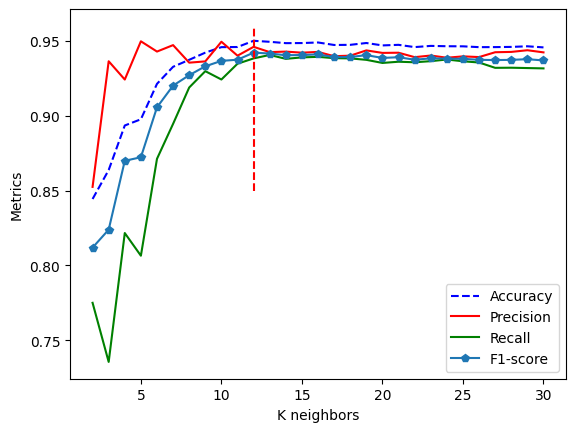

In [15]:
# Plot results
plt.plot( Depths, Accuracy_list,  'b--', label='Accuracy')
plt.plot( Depths, Precision_list,  'r-', label='Precision')
plt.plot( Depths, Recall_list,  'g-', label='Recall')
plt.plot( Depths, F1_list,  'p-', label='F1-score')
plt.xlabel( 'K neighbors' )
plt.ylabel( 'Metrics' )
plt.legend()
plt.vlines( best_depth, 0.85, 0.96, color='r', linestyle='--' )
#plt.hlines( 0.95, 0, 1, color='b', linestyle='--' )
#plt.hlines( 0.68, 0, 1, color='g', linestyle='--' )

### 2.3. FIT Again for X_TRAIN + X_VAL

In [16]:
#.......... FINAL TREE MODEL

# Model Definition:
tree_FinalClassifier = tr.DecisionTreeClassifier( 
    max_depth=best_depth,
    min_samples_leaf=best_leaf )

# Training Decision TREE:
tree_FinalClassifier.fit(
    np.concatenate( (X_train_tree, X_val_tree) ),
    np.concatenate( (y_train, y_val) ) 
)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=3)

### 2.4. Performance in Training Set

In [17]:
# CASE-1: PERFORMANCE FOR X_TRAIN

yhat_train = tree_BestClassifier.predict_proba( X_train_tree )[:, 1]
yhat = tree_classifier.predict( X_train_tree )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_train, yhat_train )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_train, yhat_train )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_train ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_train, pred )
Accuracy = mt.accuracy_score( y_train, pred )
Precision = mt.precision_score( y_train, pred )
Recall = mt.recall_score( y_train, pred )
F1_score = mt.f1_score( y_train, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 96.373
Precisão: 96.350
Recall..: 95.240
F1-score: 95.792


### 2.5. Performance in Validation Set

In [18]:
# CASE-2: PERFORMANCE FOR X_VAL

yhat_val = tree_BestClassifier.predict_proba( X_val_tree )[:, 1]
yhat = tree_classifier.predict( X_val_tree )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_val, yhat_val )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_val, yhat_val )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_val, pred )
Accuracy = mt.accuracy_score( y_val, pred )
Precision = mt.precision_score( y_val, pred )
Recall = mt.recall_score( y_val, pred )
F1_score = mt.f1_score( y_val, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 95.006
Precisão: 94.603
Recall..: 93.830
F1-score: 94.215


### 2.6. Final Performance, using X_TEST

In [19]:
# CASE-4: PERFORMANCE FOR X_TEST

yhat_test = tree_BestClassifier.predict_proba( X_test_tree )[:, 1]
yhat = tree_BestClassifier.predict( X_test_tree )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_test, yhat_test )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_test, yhat_test )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_test ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_test, pred )
Accuracy = mt.accuracy_score( y_test, pred )
Precision = mt.precision_score( y_test, pred )
Recall = mt.recall_score( y_test, pred )
F1_score = mt.f1_score( y_test, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 94.763
Precisão: 94.402
Recall..: 93.621
F1-score: 94.010


## 3. Algorithm: RANDOM FOREST

### 3.1. Features Selection

In [ ]:
# Use all features: df_X_train, df_X_val, df_X_test, 
#                   df_y_train, df_y_val, df_y_test

### 3.2. Optimization & Holdout Validation

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Parameters to search for
# ------------------------
#
# n_estimators: the number of trees in the forest. Default = 100
#
# max_depth: The maximum depth of the tree. Default = None 
#            If None, then nodes are expanded until all leaves are pure 
#            or until all leaves contain less than min_samples_split samples.
#
# min_samples_leaf: The minimum number of samples required to be at a leaf node. Default=1
#                   A split point at any depth will only be considered if it 
#                   leaves at least min_samples_leaf training samples in each 
#                   of the left and right branches. This may have the effect of 
#                   smoothing the model, especially in regression.
#
# min_samples_split: The minimum number of samples required to split an internal node. Defaut=2
#                    - If int, then consider min_samples_split as the minimum number.
#                    - If float, then min_samples_split is a fraction and 
#                    ceil(min_samples_split * n_samples) are the minimum number of 
#                    samples for each split
#

#Maximum_Depth = 20
#Depths = [     2,  3,  4,  5,  6,  7,  8,  9, 10,
#          11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
#          21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
#Leaves = [ 3 ]

TruePrecisionFalseROC = False

best_nestimators = 0
best_depth = 0
best_leaf = 0
best_split = 0
best_Accuracy = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
F1_list = list()
Accuracy_list = list()
Precision_list = list()
Recall_list = list()

# Parameters to be optimized:
ParA = list( range( 95,   96, 1 ) )    # n_estimators
ParB = list( range(  33,  34 ) )       # max_depth
ParC = list( range(   1,   2 ) )       # min_samples_leaf
ParD = list( range(   2,   4 ) )       # min_samples_split

TotalCases = len(ParA) * len(ParB) * len(ParC) * len(ParD)

print('')
print("----->> TESTE DE {} CASOS".format(TotalCases))

# MAIN LOOP
for i in range(len(ParA)):
    for j in range(len(ParB)):
        for k in range(len(ParC)):
            for l in range(len(ParD)):
                #print( "est={}  depth={}  leaf={}  split={}".format(ParA[i], ParB[j], ParC[k], ParD[l]) )
                #..... Model Definition:
                rf_classifier = en.RandomForestClassifier( n_estimators=ParA[i], 
                                                           max_depth=ParB[j],
                                                           min_samples_leaf=ParC[k],
                                                           min_samples_split=ParD[l],
                                                           n_jobs=-1,
                                                           #verbose=1,
                                                           random_state=0 )
                #..... Training Random Forest:
                rf_classifier.fit( df_X_train, df_y_train.values.ravel())
                #..... Predict:
                yhat_val = rf_classifier.predict_proba( df_X_val )[:, 1]
                #yhat = rf_classifier.predict( df_X_val )

                #..... Decision may use PRECISION-RECALL or ROC CURVE
                if TruePrecisionFalseROC:
                    # Decision done by using PRECISION-RECALL
                    precision, recall, threshold = mt.precision_recall_curve( df_y_val, yhat_val )
                    # Find threshold where PRECISION = RECALL:
                    dif = np.abs(precision - recall).tolist()
                    PosTH = dif.index(min(dif))
                    th = threshold[PosTH]
                else:
                    # Decision done by using ROC CURVE
                    fpr, tpr, threshold = mt.roc_curve( df_y_val, yhat_val)
                    # Find threshold where TPR = [ 1 - FPR]
                    dif = np.abs(tpr + fpr - 1).tolist()
                    PosTH = dif.index(min(dif))
                    th = threshold[PosTH]

                #..... Resulting map
                pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

                #..... Performance Metrics
                Matrix = mt.confusion_matrix( df_y_val, pred )
                Accuracy = mt.accuracy_score( df_y_val, pred )
                Precision = mt.precision_score( df_y_val, pred )
                Recall = mt.recall_score( df_y_val, pred )
                F1_score = mt.f1_score( df_y_val, pred )

                #..... Save results
                Accuracy_list.append(Accuracy)
                Precision_list.append(Precision)
                Recall_list.append(Recall)
                F1_list.append(F1_score)

                if Accuracy > best_Accuracy:
                    best_Accuracy = Accuracy

                if Recall > best_Recall:
                    best_Recall = Recall

                if Precision > best_Precision:
                    best_Precision = Precision

                if F1_score > best_F1:
                    best_F1 = F1_score
                    # save best parameters
                    best_nestimators = ParA[i]
                    best_depth = ParB[j]
                    best_leaf = ParC[k]
                    best_split = ParD[l]
                    rf_BestClassifier = rf_classifier
                    # Show recent best result
                    #print("----->>> Best Parameters found...")
                    print( "Num_estim={}  Depth={}  Leaves={}  Split={} - F1: {:.3f}"
                          .format(best_nestimators, best_depth, best_leaf, best_split, best_F1 * 100) )
                    #print( 'Acurácia: {:.3f}'.format( best_Accuracy * 100 ) )
                    #print( 'Precisão: {:.3f}'.format( best_Precision * 100 ) )
                    #print( 'Recall..: {:.3f}'.format( best_Recall * 100 ) )
                    #print( 'F1-score: {:.3f}'.format( best_F1 * 100 ) )
                    #print("------------------------------------")
                    #print("")

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print( "Num_estim={}  Depth={}  Leaves={}  Split={}"
      .format(best_nestimators, best_depth, best_leaf, best_split) )
print( 'Acurácia: {:.3f}'.format( best_Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( best_Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( best_Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( best_F1 * 100 ) )

# ALGUNS RESULTADOS:
# Num_estim=30   Depth=25  Leaves=1  Split=2 - F1: 95.371
# Num_estim=66   Depth=29  Leaves=1  Split=2 - F1: 95.483 (resultado igual ao 142)
# Num_estim=95   Depth=33  Leaves=1  Split=2 - F1: 95.518 (melhor resultado)
# Num_estim=142  Depth=28  Leaves=1  Split=2 - F1: 95.483 (resultado igual ao 66)



----->> TESTE DE 2 CASOS
Num_estim=95  Depth=33  Leaves=1  Split=2 - F1: 95.518

----- FINAL RESULTS -----
Num_estim=95  Depth=33  Leaves=1  Split=2
Acurácia: 96.100
Precisão: 95.159
Recall..: 95.879
F1-score: 95.518


### 3.3. FIT Again for X_TRAIN + X_VAL

In [21]:
#.......... FINAL RANDOM-FOREST MODEL

# Model Definition:
rf_FinalClassifier = en.RandomForestClassifier( n_estimators=best_nestimators, 
                                                max_depth=best_depth,
                                                min_samples_leaf=best_leaf,
                                                min_samples_split=best_split,
                                                n_jobs=-1,
                                                #verbose=1,
                                                random_state=0 )

# Training Random-Forest:
rf_FinalClassifier.fit(
    np.concatenate( (df_X_train, df_X_val) ),
    np.concatenate( (df_y_train, df_y_val) ) 
)

c:\ProgramData\miniconda3\envs\curso_ftc\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=33, n_estimators=95, n_jobs=-1, random_state=0)

### 3.4. Performance in Training Cases

In [22]:
# CASE-1: PERFORMANCE FOR X_TRAIN

yhat_train = rf_BestClassifier.predict_proba( df_X_train )[:, 1]
yhat = rf_BestClassifier.predict( df_X_train )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( df_y_train, yhat_train )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( df_y_train, yhat_train )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_train ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( df_y_train, pred )
Accuracy = mt.accuracy_score( df_y_train, pred )
Precision = mt.precision_score( df_y_train, pred )
Recall = mt.recall_score( df_y_train, pred )
F1_score = mt.f1_score( df_y_train, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 99.999
Precisão: 100.000
Recall..: 99.997
F1-score: 99.998


### 3.5. Performance in Validation Cases

In [23]:
# CASE-2: PERFORMANCE FOR X_VAL

yhat_val = rf_BestClassifier.predict_proba( df_X_val )[:, 1]
yhat = rf_BestClassifier.predict( df_X_val )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( df_y_val, yhat_val )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( df_y_val, yhat_val )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( df_y_val, pred )
Accuracy = mt.accuracy_score( df_y_val, pred )
Precision = mt.precision_score( df_y_val, pred )
Recall = mt.recall_score( df_y_val, pred )
F1_score = mt.f1_score( df_y_val, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 96.100
Precisão: 95.159
Recall..: 95.879
F1-score: 95.518


### 3.6. Final Performance, using X_TEST

In [24]:
# CASE-4: PERFORMANCE FOR X_TEST

yhat_test = rf_BestClassifier.predict_proba( df_X_test )[:, 1]
yhat = rf_BestClassifier.predict( df_X_test )

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( df_y_test, yhat_test )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( df_y_test, yhat_test )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_test ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( df_y_test, pred )
Accuracy = mt.accuracy_score( df_y_test, pred )
Precision = mt.precision_score( df_y_test, pred )
Recall = mt.recall_score( df_y_test, pred )
F1_score = mt.f1_score( df_y_test, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 96.014
Precisão: 95.024
Recall..: 95.944
F1-score: 95.482


### 3.6. Feature Importance

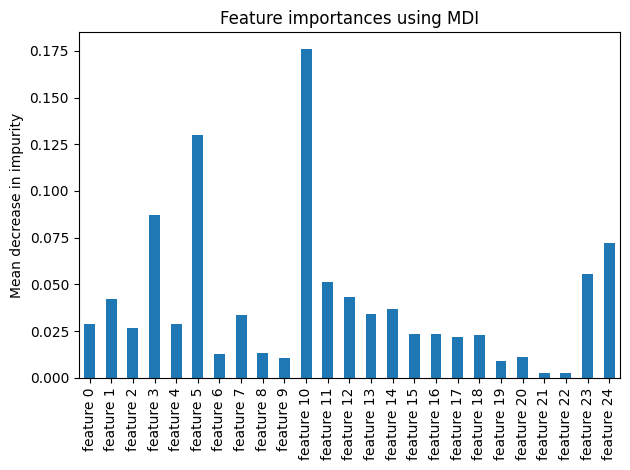

In [25]:
# plotando features
feature_names = [f"feature {i}" for i in range(df_X_test.shape[1])]
importances = rf_BestClassifier.feature_importances_

forest_importances = pd.Series( importances, index=feature_names )

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 4. Algorithm: LOGISTIC REGRESSION

### 4.1. Features Selection

In [26]:
# FEATURES SELECTION

# Keep just the numerical features that represent a distance.
# Which means: discard the ID and all binary features.

# Original features
features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

# Selected features, excluding just 'id'
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

X_train_logit = df_X_train.loc[:, features]
X_val_logit = df_X_val.loc[:, features]
X_test_logit = df_X_test.loc[:, features]

y_train = df_y_train.iloc[:, 0].values
y_val   = df_y_val.iloc[:, 0].values
y_test  = df_y_test.iloc[:, 0].values

print(f"X_train_knn: shape={X_train_logit.shape}")
print(f"y_train:     shape={y_train.shape}")
print(f"X_val_knn: shape={X_val_logit.shape}")
print(f"y_val:     shape={y_val.shape}")
print(f"X_test_knn:  shape={X_test_logit.shape}")
print(f"y_test:      shape={y_test.shape}")


X_train_knn: shape=(72515, 24)
y_train:     shape=(72515,)
X_val_knn: shape=(31079, 24)
y_val:     shape=(31079,)
X_test_knn:  shape=(25893, 24)
y_test:      shape=(25893,)


### 4.2. Optimization & Holdout Validation

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# PARAMETERS TO OPTIMIZE:

# PENALTY: regularization techniques
#Penalty = [ 'elasticnet', 'l1', 'l2' ]
Penalty = [ 'elasticnet' ]

# HYPERPARAMETER ALPHA: C = 1 / ALPHA
#CC = np.mgrid[0.05:1.0:0.05].tolist() + list( range( 1, 10 ) ) + list( range( 10, 30, 2 ) )
#CC += list( range( 30, 70, 4 ) ) + list( range( 70, 210, 10 ) )
CC = np.mgrid[0.1:0.21:0.005].tolist()

# Ratio applies only to 'elasticnet'
#Ratio = np.mgrid[0.3:0.75:0.05].tolist()
Ratio = np.mgrid[0.45:0.56:0.01].tolist()

TruePrecisionFalseROC = False

best_penalty = 0
best_c = 0
best_ratio = 0
best_Accuracy = 0
best_F1 = 0
best_Precision = 0
best_Recall = 0
F1_list = list()
Accuracy_list = list()
Precision_list = list()
Recall_list = list()

TotalCases = len(Ratio) * len(CC)

print('')
print("----->> TESTE DE {} CASOS".format(TotalCases))

# MAIN LOOP
for i in range(len(Ratio)):
    print("-------->>> Ratio={}".format(Ratio[i]))
    for j in range(len(CC)):
        #..... Model Definition:
        #TheSolver = 'saga' if Penalty[0]=='elasticnet' else 'liblinear'
        #TheRatio = 0.5 if Penalty[i]=='elasticnet' else None
        logit_classifier = lm.LogisticRegression(
            penalty='elasticnet',
            solver='saga',
            C=CC[j],
            max_iter=4000,
            l1_ratio=Ratio[i],
            random_state=42
        )
        #..... FIT
        logit_classifier.fit( X_train_logit, y_train )
        #..... PREDICT
        yhat_val = logit_classifier.predict_proba( X_val_logit )[:, 1]

        #..... Decision may use PRECISION-RECALL or ROC CURVE
        if TruePrecisionFalseROC:
            # Decision done by using PRECISION-RECALL
            precision, recall, threshold = mt.precision_recall_curve( y_val, yhat_val )
            # Find threshold where PRECISION = RECALL:
            dif = np.abs(precision - recall).tolist()
            PosTH = dif.index(min(dif))
            th = threshold[PosTH]
        else:
            # Decision done by using ROC CURVE
            fpr, tpr, threshold = mt.roc_curve( y_val, yhat_val)
            # Find threshold where TPR = [ 1 - FPR]
            dif = np.abs(tpr + fpr - 1).tolist()
            PosTH = dif.index(min(dif))
            th = threshold[PosTH]

        #..... Resulting map
        pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

        #..... Performance Metrics
        Accuracy = mt.accuracy_score( y_val, pred )
        Precision = mt.precision_score( y_val, pred )
        Recall = mt.recall_score( y_val, pred )
        F1_score = mt.f1_score( y_val, pred )

        #..... Save results
        Accuracy_list.append(Accuracy)
        Precision_list.append(Precision)
        Recall_list.append(Recall)
        F1_list.append(F1_score)

        if Accuracy > best_Accuracy:
            best_Accuracy = Accuracy

        if Recall > best_Recall:
            best_Recall = Recall

        if Precision > best_Precision:
            best_Precision = Precision

        if F1_score > best_F1:
            best_F1 = F1_score
            # save best parameters
            #best_penalty = Penalty[i]
            best_ratio = Ratio[i]
            best_c = CC[j]
            logit_BestClassifier = logit_classifier
            # Show recent best result
            print( "Ratio={}  C(alpha)={} - F1: {:.3f}"
                  .format(best_ratio, best_c, best_F1 * 100) )

# Show best result:
print("")
print("----- FINAL RESULTS -----")
print( "Ratio={}  C(alpha)={} - F1: {:.3f}"
      .format(best_ratio, best_c, best_F1 * 100) )
print( 'Acurácia: {:.3f}'.format( best_Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( best_Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( best_Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( best_F1 * 100 ) )

# ALGUNS RESULTADOS:
# Penalty=elasticnet  C(alpha)=0.15000000000000002 - F1: 84.726
# Penalty=elasticnet  C(alpha)=0.15500000000000005 - F1: 84.729
# Penalty=elasticnet  Ratio=0.3   C(alpha)=0.3     - F1: 84.729
# Penalty=elasticnet  Ratio=0.25  C(alpha)=0.31    - F1: 84.729
# Penalty=elasticnet  Ratio=0.56  C(alpha)=0.145   - F1: 84.730



----->> TESTE DE 264 CASOS
-------->>> Ratio=0.45
Ratio=0.45  C(alpha)=0.1 - F1: 84.709
Ratio=0.45  C(alpha)=0.11500000000000002 - F1: 84.712
Ratio=0.45  C(alpha)=0.12000000000000002 - F1: 84.715
Ratio=0.45  C(alpha)=0.12500000000000003 - F1: 84.722
Ratio=0.45  C(alpha)=0.15500000000000005 - F1: 84.726
-------->>> Ratio=0.46
-------->>> Ratio=0.47000000000000003
Ratio=0.47000000000000003  C(alpha)=0.15500000000000005 - F1: 84.729
-------->>> Ratio=0.48000000000000004
-------->>> Ratio=0.49000000000000005
-------->>> Ratio=0.5
-------->>> Ratio=0.51
-------->>> Ratio=0.52
-------->>> Ratio=0.53
-------->>> Ratio=0.54
-------->>> Ratio=0.55
-------->>> Ratio=0.56
Ratio=0.56  C(alpha)=0.14500000000000005 - F1: 84.730

----- FINAL RESULTS -----
Ratio=0.56  C(alpha)=0.14500000000000005 - F1: 84.730
Acurácia: 86.489
Precisão: 83.041
Recall..: 86.495
F1-score: 84.730


### 4.3. FIT Again for X_TRAIN + X_VAL

In [28]:
#.......... FINAL MODEL

# Model Definition:
logit_FinalClassifier = lm.LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    C=best_c,
    max_iter=4000,
    l1_ratio=best_ratio,
    random_state=42
)

# Training Random-Forest:
# X_val_logit, y_val
logit_FinalClassifier.fit(
    np.concatenate( (X_train_logit, X_val_logit) ),
    np.concatenate( (y_train, y_val) ) 
)

LogisticRegression(C=0.14500000000000005, l1_ratio=0.56, max_iter=4000,
                   penalty='elasticnet', random_state=42, solver='saga')

### 4.4. Performance in Training Cases

In [29]:
# CASE-1: PERFORMANCE FOR X_TRAIN

yhat_train = logit_BestClassifier.predict_proba( X_train_logit )[:, 1]

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_train, yhat_train )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_train, yhat_train )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_train ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_train, pred )
Accuracy = mt.accuracy_score( y_train, pred )
Precision = mt.precision_score( y_train, pred )
Recall = mt.recall_score( y_train, pred )
F1_score = mt.f1_score( y_train, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 86.527
Precisão: 83.088
Recall..: 86.525
F1-score: 84.771


### 4.5. Performance in Validation Cases

In [30]:
# CASE-2: PERFORMANCE FOR X_VAL

# X_val_logit, y_val
yhat_val = logit_BestClassifier.predict_proba( X_val_logit )[:, 1]

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_val, yhat_val )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_val, yhat_val )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_val ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_val, pred )
Accuracy = mt.accuracy_score( y_val, pred )
Precision = mt.precision_score( y_val, pred )
Recall = mt.recall_score( y_val, pred )
F1_score = mt.f1_score( y_val, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )


Acurácia: 86.489
Precisão: 83.036
Recall..: 86.495
F1-score: 84.730


### 4.6. Final Performance, using X_TEST

In [31]:
# CASE-4: PERFORMANCE FOR X_TEST

# X_test_logit, y_test
yhat_test = logit_BestClassifier.predict_proba( X_test_logit )[:, 1]

if TruePrecisionFalseROC:
    # Decision done by using PRECISION-RECALL
    precision, recall, threshold = mt.precision_recall_curve( y_test, yhat_test )
    # Find threshold where PRECISION = RECALL:
    dif = np.abs(precision - recall).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]
else:
    # Decision done by using ROC CURVE
    fpr, tpr, threshold = mt.roc_curve( y_test, yhat_test )
    # Find threshold where TPR = [ 1 - FPR]
    dif = np.abs(tpr + fpr - 1).tolist()
    PosTH = dif.index(min(dif))
    th = threshold[PosTH]

# Resulting map
pred  = pd.Series( yhat_test ).map( lambda x: 1 if x > th else 0 )

# Performance Metrics
Matrix = mt.confusion_matrix( y_test, pred )
Accuracy = mt.accuracy_score( y_test, pred )
Precision = mt.precision_score( y_test, pred )
Recall = mt.recall_score( y_test, pred )
F1_score = mt.f1_score( y_test, pred )

print( 'Acurácia: {:.3f}'.format( Accuracy * 100 ) )
print( 'Precisão: {:.3f}'.format( Precision * 100 ) )
print( 'Recall..: {:.3f}'.format( Recall * 100 ) )
print( 'F1-score: {:.3f}'.format( F1_score * 100 ) )

Acurácia: 86.255
Precisão: 83.082
Recall..: 86.247
F1-score: 84.635


## FIM